In [1]:
import sys
import os
possible_paths = [
        '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data',
        'F:/spectral_clustering_finance/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data'
    ]

path = None
for p in possible_paths:
    if os.path.isdir(p):
        path = p
        print(f"Using data path: {path}")
        break

if path is None:
    print("Error: No valid data path found.")
    sys.exit(1)

Using data path: /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set


In [5]:
from utils.returns import *
from utils.trader import execute_trading_strategy
from utils.helper import *
import time
import matplotlib.pyplot as plt

In [3]:
eligible_dates_txt_output = path + '/eligible_dates.txt'
eligible_dates = get_eligible_date_paths_from_file(eligible_dates_txt_output)

Successfully read 5269 paths from /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/eligible_dates.txt


In [4]:
print(f"Eligible dates loaded: {eligible_dates}")

Eligible dates loaded: ['/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000103.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000316.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000331.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000414.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20001218.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010102.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010103.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010104.csv.gz', '/Users/khang/Desktop/ma

Day 64: PnL = [ 0.03 -0.01 -0.03]
Day 67: PnL = [-0.    0.    0.05]
Day 70: PnL = [ 0.02 -0.08 -0.01]
Day 73: PnL = [ 0.03 -0.12 -0.01]
Day 74: PnL = [0.12]
Day 75: PnL = [0.06]
Day 78: PnL = [-0.03  0.   -0.04]
Day 79: PnL = [0.06]
Day 81: PnL = [0.05 0.01]
Day 84: PnL = [ 0.02 -0.03  0.03]
Day 87: PnL = [ 0.01 -0.17  0.04]
Day 89: PnL = [0.02 0.04]
Day 90: PnL = [0.05]
Day 92: PnL = [-0.01  0.07]
Day 93: PnL = [0.12]
Day 96: PnL = [-0.   -0.03  0.02]
Day 97: PnL = [0.09]
Day 100: PnL = [-0.07  0.02 -0.01]
Day 103: PnL = [-0.   -0.01  0.02]
Day 106: PnL = [ 0.01  0.02 -0.02]
Day 107: PnL = [0.08]
Day 109: PnL = [0.04 0.09]
Day 112: PnL = [ 0.03 -0.02  0.02]
Day 115: PnL = [-0.02 -0.07  0.05]
Day 116: PnL = [0.07]
Day 119: PnL = [0.03 0.02 0.02]
Day 122: PnL = [-0.05  0.05 -0.05]
Day 123: PnL = [0.2]
Day 126: PnL = [-0.02 -0.07  0.04]
Day 129: PnL = [-0.07  0.04  0.05]
Day 130: PnL = [0.06]
Day 132: PnL = [0.02 0.1 ]
Day 134: PnL = [0.05 0.01]
Day 137: PnL = [-0.02  0.    0.01]
Day 140

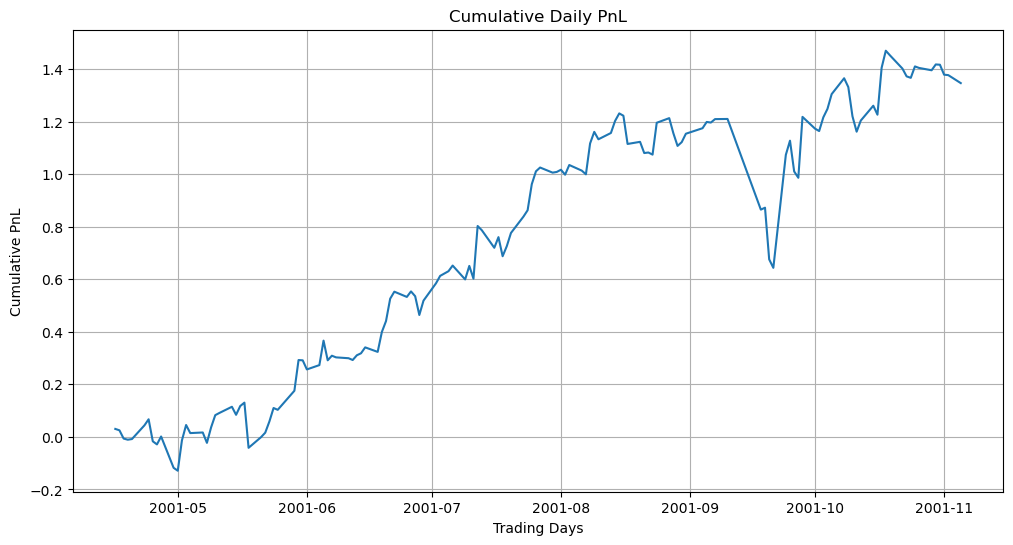

In [6]:
start_time = time.time()
daily_PnL, date = execute_trading_strategy(win_threshold=0.05,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates,
                                     weighting_scheme= "uniform")
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

cumulative_pnl = np.cumsum(daily_PnL)
plt.figure(figsize=(12, 6))
plt.plot(date, cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.show()

Day 62: PnL = [0.06]
Day 65: PnL = [-0.08 -0.47  0.09]
Day 66: PnL = [0.08]
Day 67: PnL = [0.31]
Day 70: PnL = [-0.02 -0.18  0.15]
Day 71: PnL = [0.05]
Day 74: PnL = [-0.18 -0.06 -0.27]
Day 77: PnL = [ 0.04 -0.3  -0.07]
Day 80: PnL = [ 0.   -0.22 -0.15]
Day 82: PnL = [-0.02  0.08]
Day 85: PnL = [-0.14  0.07 -0.03]
Day 88: PnL = [-0.37 -0.03  0.11]
Day 90: PnL = [0.04 0.09]
Day 93: PnL = [-0.05  0.07  0.22]
Day 96: PnL = [-0.14 -0.12  0.07]
Day 97: PnL = [0.18]
Day 100: PnL = [-0.1   0.01 -0.03]
Day 103: PnL = [-0.02  0.02  0.02]
Day 106: PnL = [-0.05  0.03  0.01]
Day 107: PnL = [0.2]
Day 108: PnL = [0.12]
Day 110: PnL = [0.04 0.07]
Day 113: PnL = [-0.21  0.08 -0.02]
Day 115: PnL = [-0.04  0.14]
Day 116: PnL = [0.08]
Day 118: PnL = [0.01 0.1 ]
Day 119: PnL = [0.08]
Day 122: PnL = [-0.06  0.09 -0.07]
Day 123: PnL = [0.43]
Day 126: PnL = [-0.11 -0.13  0.01]
Day 129: PnL = [-0.24  0.07  0.1 ]
Day 132: PnL = [-0.08  0.03  0.22]
Day 134: PnL = [0.02 0.1 ]
Day 137: PnL = [0.01 0.01 0.05]
Day 

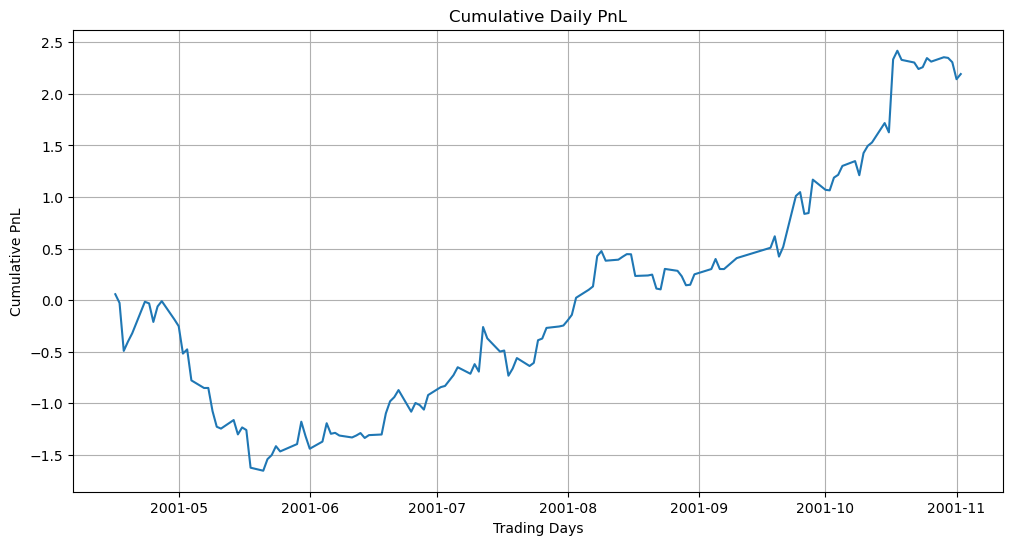

In [9]:
start_time = time.time()
daily_PnL, date = execute_trading_strategy(win_threshold=0.05,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates,
                                     weighting_scheme = "linear")
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

cumulative_pnl = np.cumsum(daily_PnL)
plt.figure(figsize=(12, 6))
plt.plot(date, cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
import numpy as np

from utils.cluster import clusterize
from utils.returns import get_sliding_window_data

In [34]:
def identify_stocks(R_curr: pd.DataFrame, lookforward_window = 3, w = 5, threshold = 0):
    R_curr = R_curr.copy()

    # On each day, calculate the deviation from the mean of the cluster for each stock
    numeric_cols = R_curr.columns.difference(['ticker', 'cluster'])
    R_curr[numeric_cols] = (
        R_curr
        .groupby('cluster')[numeric_cols]
        .transform(lambda col: col - col.mean())
    )
    # Drop the non-numeric columns, then sum all deviations within the specified window
    # Drop the non-numeric columns, then sum all deviations within the specified window
    numeric_cols = R_curr.columns.difference(['ticker', 'cluster'])
    # Select the columns in the window: from -lookforward_window-w to -lookforward_window (exclusive)
    window_start = -lookforward_window - w
    window_end = -lookforward_window
    window_cols = numeric_cols[window_start:window_end]
    R_curr['deviation'] = R_curr[window_cols].sum(axis=1)
    # Drop the non-numeric columns, then sum all deviations within the sliding window
    #R_curr['deviation'] = R_curr.drop(columns=['ticker', 'cluster']).sum(axis=1)

    # Start with zeros
    R_curr['trade'] = 0

    # Set +1 where deviation exceeds threshold signifying winners
    R_curr.loc[R_curr['deviation'] > threshold, 'trade'] = 1

    # Set -1 where deviation is below threshold signifying losers
    R_curr.loc[R_curr['deviation'] < - threshold, 'trade'] = -1

    return R_curr

In [23]:
R_curr, market_curr = get_sliding_window_data(eligible_dates, lookback_window=5, lookforward_window=2, start_date = 5)
print(market_curr)
R_curr

[np.float64(0.048034934497816595) np.float64(-0.010763851851851913)
 np.float64(0.02286185944591157) np.float64(0.008784699210490743)
 np.float64(-0.005660377358490565) np.float64(0.006641293241862467)
 np.float64(-0.022692599339708464)]


,ticker,20010103,20010104,20010129,20010130,20010131,20010201,20010202
1,AA,0.013566,0.032505,0.008000,0.041152,0.037267,0.034295,-0.011842
2,AAI,0.045455,0.026087,0.233898,0.098901,0.038000,-0.028902,-0.048611
3,AAM,0.230769,0.062500,-0.105882,0.021053,0.144330,0.747748,-0.252577
4,AAS,0.020025,-0.082209,0.043209,-0.015993,-0.003334,-0.006899,0.033684
5,AAT,0.010526,0.005208,-0.003523,0.011647,-0.001645,-0.000824,-0.006595
...,...,...,...,...,...,...,...,...
2870,ZLC,0.070136,0.014799,0.179333,0.013850,0.039866,0.002145,-0.026752
2871,ZNH,0.071730,0.007874,-0.081250,-0.030612,-0.012632,0.063255,-0.024064
2872,ZNT,0.008811,-0.015284,0.046563,0.016949,0.010000,-0.011551,-0.016694
2873,ZQK,0.095890,-0.003125,0.198746,0.035565,0.006465,-0.016058,-0.002448


In [53]:
lookback_window = 5
R_cov = R_curr.iloc[:, : lookback_window + 1]
market_cov = market_curr[: lookback_window]
print(market_cov)
R_cov

[np.float64(0.048034934497816595) np.float64(-0.010763851851851913)
 np.float64(0.02286185944591157) np.float64(0.008784699210490743)
 np.float64(-0.005660377358490565)]


,ticker,20010103,20010104,20010129,20010130,20010131
1,AA,0.013566,0.032505,0.008000,0.041152,0.037267
2,AAI,0.045455,0.026087,0.233898,0.098901,0.038000
3,AAM,0.230769,0.062500,-0.105882,0.021053,0.144330
4,AAS,0.020025,-0.082209,0.043209,-0.015993,-0.003334
5,AAT,0.010526,0.005208,-0.003523,0.011647,-0.001645
...,...,...,...,...,...,...
2870,ZLC,0.070136,0.014799,0.179333,0.013850,0.039866
2871,ZNH,0.071730,0.007874,-0.081250,-0.030612,-0.012632
2872,ZNT,0.008811,-0.015284,0.046563,0.016949,0.010000
2873,ZQK,0.095890,-0.003125,0.198746,0.035565,0.006465


In [54]:
cl_med = 'SPONGE'
num_med = 'self'
R_cov = clusterize(cl_med, num_med, R_cov, market_cov)

In [55]:
R_cov = identify_stocks(R_cov, lookforward_window=3, w=5, threshold=0.05)
R_cov

,ticker,20010103,20010104,20010129,20010130,20010131,cluster,deviation,trade
1,AA,-0.012699,0.032459,0.063757,0.016433,0.043781,11,0.019760,0
2,AAI,0.032026,0.048671,0.074199,0.094585,0.029062,26,0.080697,1
3,AAM,0.184080,0.056621,-0.046539,0.016339,0.136134,39,0.240701,1
4,AAS,0.032861,-0.020889,-0.002859,-0.025638,-0.009054,20,0.011972,0
5,AAT,-0.015738,0.005163,0.052233,-0.013072,0.004869,11,-0.010576,0
...,...,...,...,...,...,...,...,...,...
2870,ZLC,0.036989,0.016323,-0.031242,0.017563,0.037227,4,0.053312,1
2871,ZNH,0.025041,0.001995,-0.021907,-0.035326,-0.020828,39,0.027036,0
2872,ZNT,0.014121,0.025192,-0.033490,0.004579,0.000765,27,0.039313,0
2873,ZQK,0.092423,0.010545,0.036554,0.021958,0.009775,5,0.102968,1


In [65]:
R_cov = assign_stock_weights(R_cov, weighting_scheme= 'exponential')
first_cluster_id = R_cov['cluster'].min()
first_cluster = R_cov[R_cov['cluster'] == first_cluster_id]
# Save first_cluster DataFrame to CSV for viewing
first_cluster.to_csv('first_cluster.csv', index=False)
print("first_cluster saved to first_cluster.csv")

first_cluster saved to first_cluster.csv


In [51]:
first_cluster_id = R_cov['cluster'].min()
first_cluster = R_cov[R_cov['cluster'] == first_cluster_id]
print(first_cluster)

     ticker  20010103  20010104  20010129  20010130  20010131  cluster  \
65     AGTX  0.016934 -0.144270 -0.006400  0.002383 -0.027401        0   
120     AMO  0.016511  0.041481  0.009780 -0.009278 -0.012908        0   
140     APA -0.101893 -0.024862 -0.081797 -0.027659 -0.040424        0   
142     APC -0.102980 -0.033331 -0.079187 -0.015968 -0.035247        0   
189     ATS -0.035698  0.105730  0.061292 -0.001890  0.093726        0   
229     BAB -0.024227  0.022397 -0.001452  0.018313  0.037227        0   
318     BLX -0.039374  0.011327 -0.043117  0.010213 -0.021142        0   
561     CNX -0.078879  0.039024 -0.044531 -0.017106  0.002960        0   
567     COG -0.029246 -0.067347 -0.013536  0.004726 -0.001027        0   
628     CTS  0.099484 -0.009664  0.059972  0.009946  0.000256        0   
761     DVA  0.061579 -0.030794  0.076596 -0.016283  0.046185        0   
777     ECA -0.071734  0.031743 -0.050845  0.013487 -0.000655        0   
782     EDF  0.053191 -0.018419  0.019

In [50]:
for cluster_id in R_cov['cluster'].unique():
    cluster_mask = R_cov['cluster'] == cluster_id

    # Winners in this cluster
    winners = R_cov[cluster_mask & (R_cov['trade'] == 1)]
    x_values = winners['deviation']
    sum_x = x_values.sum()
    if sum_x != 0:
        R_cov.loc[cluster_mask & (R_cov['trade'] == 1), 'notional'] = -x_values / sum_x
    else:
        R_cov.loc[cluster_mask & (R_cov['trade'] == 1), 'notional'] = 0

    # Losers in this cluster
    losers = R_cov[cluster_mask & (R_cov['trade'] == -1)]
    y_values = -losers['deviation']
    sum_y = y_values.sum()
    if sum_y != 0:
        R_cov.loc[cluster_mask & (R_cov['trade'] == -1), 'notional'] = y_values / sum_y
    else:
        R_cov.loc[cluster_mask & (R_cov['trade'] == -1), 'notional'] = 0
    R_cov.loc[cluster_mask & (R_cov['trade'] == 0), 'notional'] = 0
notional_counts = R_cov.groupby('cluster')['notional'].apply(
    lambda x: pd.Series({
        'positive': (x > 0).sum(),
        'negative': (x < 0).sum(),
        'zero': (x == 0).sum()
    })
)

for idx, val in notional_counts.items():
    print(idx, val)

(0, 'positive') 18
(0, 'negative') 17
(0, 'zero') 18
(1, 'positive') 23
(1, 'negative') 19
(1, 'zero') 41
(2, 'positive') 89
(2, 'negative') 56
(2, 'zero') 27
(3, 'positive') 114
(3, 'negative') 55
(3, 'zero') 26
(4, 'positive') 19
(4, 'negative') 19
(4, 'zero') 17
(5, 'positive') 14
(5, 'negative') 11
(5, 'zero') 26
(6, 'positive') 3
(6, 'negative') 2
(6, 'zero') 3
(7, 'positive') 8
(7, 'negative') 3
(7, 'zero') 4
(8, 'positive') 13
(8, 'negative') 5
(8, 'zero') 4
(9, 'positive') 2
(9, 'negative') 2
(9, 'zero') 0
(10, 'positive') 78
(10, 'negative') 47
(10, 'zero') 22
(11, 'positive') 37
(11, 'negative') 26
(11, 'zero') 31
(12, 'positive') 58
(12, 'negative') 34
(12, 'zero') 30
(13, 'positive') 66
(13, 'negative') 38
(13, 'zero') 53
(14, 'positive') 10
(14, 'negative') 7
(14, 'zero') 16
(15, 'positive') 101
(15, 'negative') 50
(15, 'zero') 43
(16, 'positive') 27
(16, 'negative') 21
(16, 'zero') 11
(17, 'positive') 19
(17, 'negative') 16
(17, 'zero') 21
(18, 'positive') 21
(18, 'negati

In [66]:
def assign_stock_weights(R_curr: pd.DataFrame, weighting_scheme='uniform'):
    R_curr = R_curr.copy()
    R_curr['notional'] = 0.0  # Initialize the 'notional' column with zeros
    
    if weighting_scheme == 'uniform':
        # Calculate nK and mK for each cluster
        cluster_counts = R_curr.groupby('cluster')['trade'].value_counts().unstack(fill_value=0)

        # Calculate the notional values
        # If trade is +1, notional is 1 / number of +1 trades in the cluster
        # If trade is -1, notional is 1 / number of -1 trades in the cluster
        # If trade is 0, notional is 0
        for cluster_id in cluster_counts.index:
            nK = cluster_counts.loc[cluster_id].get(1, 0)  # Get count of +1 trades, default to 0 if no +1
            mK = cluster_counts.loc[cluster_id].get(-1, 0) # Get count of -1 trades, default to 0 if no -1

            # Assign notional for +1 trades in the current cluster, handling division by zero
            if nK > 0:
                R_curr.loc[(R_curr['cluster'] == cluster_id) & (R_curr['trade'] == 1), 'notional'] = -1 / nK

            # Assign notional for -1 trades in the current cluster, handling division by zero
            if mK > 0:
                R_curr.loc[(R_curr['cluster'] == cluster_id) & (R_curr['trade'] == -1), 'notional'] = 1 / mK

    elif weighting_scheme == 'linear':
        # Apply linear weighting within each cluster
        for cluster_id in R_curr['cluster'].unique():
            cluster_mask = R_curr['cluster'] == cluster_id

            # Winners in this cluster
            winners = R_curr[cluster_mask & (R_curr['trade'] == 1)]
            x_values = winners['deviation']
            sum_x = x_values.sum()
            if sum_x != 0:
                R_curr.loc[cluster_mask & (R_curr['trade'] == 1), 'notional'] = -x_values / sum_x
            else:
                R_curr.loc[cluster_mask & (R_curr['trade'] == 1), 'notional'] = 0

            # Losers in this cluster
            losers = R_curr[cluster_mask & (R_curr['trade'] == -1)]
            y_values = -losers['deviation']
            sum_y = y_values.sum()
            if sum_y != 0:
                R_curr.loc[cluster_mask & (R_curr['trade'] == -1), 'notional'] = y_values / sum_y
            else:
                R_curr.loc[cluster_mask & (R_curr['trade'] == -1), 'notional'] = 0
            R_cov.loc[cluster_mask & (R_cov['trade'] == 0), 'notional'] = 0
    
    elif weighting_scheme == 'exponential':
        # Apply exponential weighting within each cluster
        for cluster_id in R_curr['cluster'].unique():
            cluster_mask = R_curr['cluster'] == cluster_id

            # Winners in this cluster
            winners = R_curr[cluster_mask & (R_curr['trade'] == 1)]
            x_values = winners['deviation']
            exp_x = np.exp(x_values)
            sum_exp_x = exp_x.sum()
            if sum_exp_x != 0:
                R_curr.loc[cluster_mask & (R_curr['trade'] == 1), 'notional'] = -exp_x / sum_exp_x
            else:
                R_curr.loc[cluster_mask & (R_curr['trade'] == 1), 'notional'] = 0

            # Losers in this cluster
            losers = R_curr[cluster_mask & (R_curr['trade'] == -1)]
            y_values = -losers['deviation']
            exp_y = np.exp(y_values)
            sum_exp_y = exp_y.sum()
            if sum_exp_y != 0:
                R_curr.loc[cluster_mask & (R_curr['trade'] == -1), 'notional'] = exp_y / sum_exp_y
            else:
                R_curr.loc[cluster_mask & (R_curr['trade'] == -1), 'notional'] = 0

            R_curr.loc[cluster_mask & (R_curr['trade'] == 0), 'notional'] = 0
    
    elif weighting_scheme == 'threshold':
        pass

    return R_curr

In [70]:
def execute_trading_strategy(win_threshold: float,
                            lookback_window = 60,
                            lookforward_window = 3,
                            w = 5,
                            eligible_dates = None,
                            cl_med = 'SPONGE',
                            num_med = 'var',
                            weighting_scheme = 'uniform'):
    # record the total number of days
    num_dates = len(eligible_dates)
    # first trading day
    current_date = lookback_window
    # record daily_PnL
    daily_PnL = []
    curr_date_str = []

# renew_portfolio criteria
    # trading_period = 0
    # trading_PnL = 0
    # update_portfolio = True

    # while current_date + lookforward_window < num_dates:
    while current_date + lookforward_window < 200:
        start_date = current_date - lookback_window
        # size of R_curr: #stocks x (1 ticker + 63 days)
        # size of market_curr: 63
        R_curr, market_curr = get_sliding_window_data(eligible_dates = eligible_dates,
                                                    lookback_window = lookback_window,
                                                    lookforward_window=lookforward_window,
                                                    start_date = start_date)
        
        # """ WINSORIZATION! """
        # R_curr_np = R_curr.select_dtypes(include='number').to_numpy()
        # for j in range(R_curr_np.shape[1]):
        #     R_curr_np[:,j] = winsorize(R_curr_np[:,j])
        # R_curr.iloc[:, 1:] = R_curr_np
        
        # R_cov is the matrix containing the return in the 60 days lookback window
        R_cov = R_curr.iloc[:, : lookback_window + 1]
        market_cov = market_curr[: lookback_window]
        # clusterize the stocks
        R_cov = clusterize(cl_med, num_med, R_cov, market_cov)
        R_cov = assign_stock_weights(identify_stocks(R_cov), weighting_scheme= weighting_scheme)
        # calculate PnLs for the lookforward window
        bet_size = R_cov['notional'].to_numpy()
        lookback = -1 * lookforward_window
        future_return = R_curr.iloc[:, lookback:].to_numpy()
        PnLs = future_return.T @ bet_size
        Cumpnl = np.cumsum(PnLs)

        if np.max(Cumpnl) > win_threshold:
            index = np.argmax(Cumpnl > win_threshold)
            PnLs = PnLs[:index+1]

            daily_PnL += PnLs.tolist()
            current_date += index + 1
            # record date stamps 
            for i in range(index+1):
                curr_date_str.append(R_curr.columns[-lookforward_window+i])
        else:
            daily_PnL += PnLs.tolist()
            current_date += lookforward_window
            # record date stamps
            for i in range(lookforward_window):
                curr_date_str.append(R_curr.columns[-lookforward_window+i])
        print(f"Day {current_date+1}: PnL = {PnLs}")
    date = pd.to_datetime(curr_date_str, format='%Y%m%d')
    return daily_PnL, date

Day 64: PnL = [ 0.04  0.01 -0.05]
Day 67: PnL = [ 0.   -0.02  0.06]
Day 70: PnL = [ 0.02 -0.09 -0.01]
Day 73: PnL = [ 0.02 -0.13 -0.03]
Day 74: PnL = [0.14]
Day 75: PnL = [0.06]
Day 78: PnL = [-0.03 -0.   -0.04]
Day 81: PnL = [ 0.03 -0.06 -0.01]
Day 84: PnL = [ 0.   -0.02 -0.02]


/opt/miniconda3/envs/math285j_project/lib/python3.13/site-packages/signet/cluster.py:525: UserWarning: Exited at iteration 7 with accuracies 
[1.56e-05 7.44e-06 8.51e-06 1.29e-05 4.47e-05 3.32e-06 1.92e-06 1.46e-06
 1.92e-09 1.29e-09 5.79e-10 5.54e-10 2.26e-10 6.38e-11 2.49e-11]
not reaching the requested tolerance 3.762543201446533e-05.
Use iteration 7 instead with accuracy 
6.387021595796423e-06.

  (w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)


Day 87: PnL = [ 0.01 -0.16  0.04]
Day 89: PnL = [0.02 0.04]
Day 90: PnL = [0.06]
Day 92: PnL = [-0.01  0.06]
Day 93: PnL = [0.11]
Day 96: PnL = [-0.01 -0.02  0.02]
Day 97: PnL = [0.1]
Day 100: PnL = [-0.08  0.02 -0.03]
Day 103: PnL = [-0.01 -0.01  0.02]
Day 106: PnL = [ 0.02  0.02 -0.01]
Day 109: PnL = [ 0.01 -0.   -0.03]
Day 112: PnL = [ 0.04 -0.01 -0.  ]
Day 115: PnL = [-0.02 -0.1   0.07]
Day 116: PnL = [0.05]
Day 119: PnL = [0.03 0.01 0.02]
Day 122: PnL = [-0.04  0.05 -0.01]
Day 123: PnL = [0.22]
Day 126: PnL = [-0.01 -0.09  0.02]
Day 129: PnL = [-0.09  0.05  0.05]
Day 130: PnL = [0.06]
Day 132: PnL = [0.01 0.08]
Day 133: PnL = [0.06]
Day 136: PnL = [-0.01 -0.02  0.02]
Day 139: PnL = [ 0.05 -0.01  0.04]
Day 141: PnL = [0.04 0.03]
Day 142: PnL = [0.06]
Day 145: PnL = [ 0.04 -0.03  0.02]
Day 147: PnL = [0.05 0.02]
Day 150: PnL = [-0.01 -0.11  0.01]
Day 153: PnL = [-0.04 -0.02 -0.  ]
Day 154: PnL = [0.12]
Day 157: PnL = [ 0.01 -0.07 -0.04]
Day 159: PnL = [0.   0.06]
Day 162: PnL = [0.0

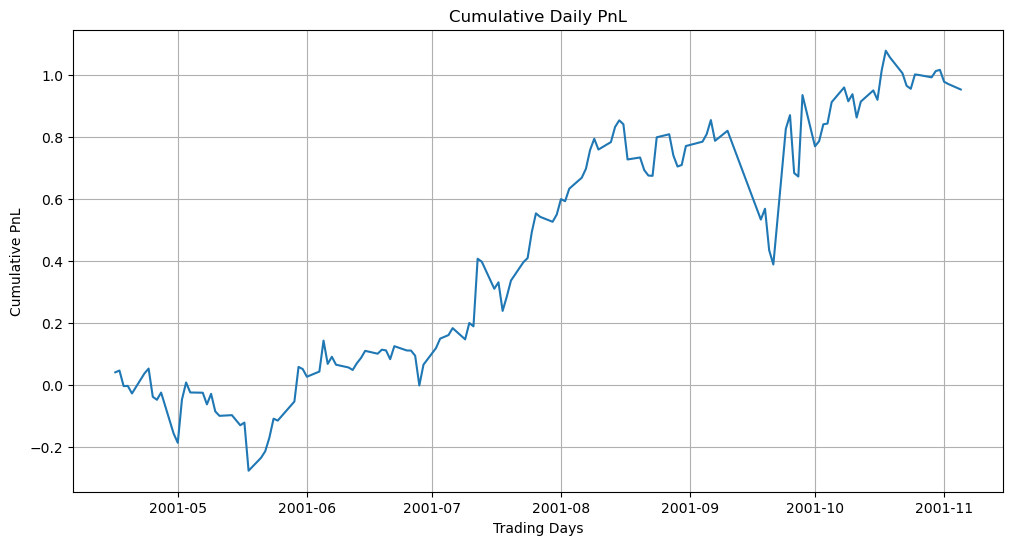

In [72]:
import time

start_time = time.time()
daily_PnL, date = execute_trading_strategy(win_threshold=0.05,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates,
                                     weighting_scheme='uniform')
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

cumulative_pnl = np.cumsum(daily_PnL)

plt.figure(figsize=(12, 6))
plt.plot(date, cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.show()

Day 63: PnL = [0.04 0.1 ]
Day 66: PnL = [-0.45 -0.02  0.06]
Day 67: PnL = [0.3]
Day 70: PnL = [-0.04 -0.21  0.18]
Day 71: PnL = [0.15]
Day 74: PnL = [-0.19 -0.08 -0.29]
Day 75: PnL = [0.06]
Day 78: PnL = [-0.27 -0.11 -0.16]
Day 81: PnL = [-0.18 -0.32 -0.22]
Day 82: PnL = [0.07]
Day 85: PnL = [-0.1   0.04 -0.07]
Day 88: PnL = [-0.45 -0.02  0.05]
Day 90: PnL = [0.05 0.11]
Day 92: PnL = [-0.01  0.07]
Day 93: PnL = [0.2]
Day 96: PnL = [-0.14 -0.1   0.08]
Day 97: PnL = [0.16]
Day 100: PnL = [-0.1   0.02 -0.09]
Day 103: PnL = [-0.01  0.01  0.04]


/opt/miniconda3/envs/math285j_project/lib/python3.13/site-packages/signet/cluster.py:525: UserWarning: Exited at iteration 7 with accuracies 
[1.29e-05 1.41e-05 6.15e-06 1.87e-06 1.54e-04 8.87e-08 1.16e-08 3.74e-09
 5.67e-10 3.77e-10 3.36e-11]
not reaching the requested tolerance 3.750622272491455e-05.
Use iteration 7 instead with accuracy 
1.721730820510094e-05.

  (w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)


Day 106: PnL = [-0.07  0.04  0.01]
Day 107: PnL = [0.45]


/opt/miniconda3/envs/math285j_project/lib/python3.13/site-packages/signet/cluster.py:525: UserWarning: Exited at iteration 7 with accuracies 
[1.27e-05 2.39e-06 1.50e-06 1.71e-06 2.49e-02 2.02e-07 7.73e-10 5.97e-10
 2.70e-10 9.19e-11 5.51e-11 1.21e-11 1.33e-12 9.12e-13 4.17e-12]
not reaching the requested tolerance 3.744661808013916e-05.
Use iteration 5 instead with accuracy 
0.0014581571316022795.

  (w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)
/opt/miniconda3/envs/math285j_project/lib/python3.13/site-packages/signet/cluster.py:525: UserWarning: Exited postprocessing with accuracies 
[4.80e-04 5.32e-05 5.15e-05 5.69e-05 6.42e-14 6.00e-14 5.77e-14 6.54e-14
 5.41e-14 5.35e-14 5.37e-14 5.78e-14 5.29e-14 5.97e-14 5.94e-14]
not reaching the requested tolerance 3.744661808013916e-05.
  (w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)


Day 108: PnL = [0.08]
Day 109: PnL = [0.06]
Day 110: PnL = [0.14]
Day 113: PnL = [-0.11 -0.03  0.02]
Day 115: PnL = [-0.01  0.12]
Day 116: PnL = [0.11]
Day 118: PnL = [0.01 0.08]
Day 119: PnL = [0.06]
Day 122: PnL = [-0.08  0.12 -0.02]
Day 123: PnL = [0.41]
Day 126: PnL = [-0.12 -0.12 -0.01]
Day 129: PnL = [-0.23  0.06  0.12]
Day 132: PnL = [-0.04  0.01  0.26]
Day 134: PnL = [-0.02  0.08]
Day 136: PnL = [0.05 0.01]
Day 137: PnL = [0.15]
Day 138: PnL = [0.09]
Day 139: PnL = [0.17]
Day 140: PnL = [0.1]
Day 142: PnL = [0.05 0.26]
Day 143: PnL = [0.05]
Day 144: PnL = [0.09]
Day 145: PnL = [0.05]
Day 146: PnL = [0.05]
Day 149: PnL = [-0.03  0.01 -0.18]
Day 152: PnL = [-0.02  0.03 -0.08]
Day 154: PnL = [-0.18  0.25]
Day 157: PnL = [ 0.02 -0.1  -0.02]


/opt/miniconda3/envs/math285j_project/lib/python3.13/site-packages/signet/cluster.py:525: UserWarning: Exited at iteration 6 with accuracies 
[1.24e-05 1.46e-05 1.08e-05 5.26e-06 5.84e-04 6.46e-08 4.50e-09 5.12e-10
 1.27e-10 5.07e-11 3.89e-11 2.92e-11 2.29e-11 2.01e-11 9.93e-12 4.53e-12]
not reaching the requested tolerance 3.7163496017456055e-05.
Use iteration 6 instead with accuracy 
3.9205569387609796e-05.

  (w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)


Day 159: PnL = [0.02 0.1 ]
Day 161: PnL = [0.   0.05]
Day 164: PnL = [-0.11  0.    0.06]
Day 167: PnL = [ 0.03  0.02 -0.12]
Day 169: PnL = [0.04 0.53]
Day 172: PnL = [ 0.03 -0.22 -0.03]
Day 173: PnL = [0.33]
Day 176: PnL = [-0.1   0.03  0.17]
Day 178: PnL = [0.05 0.08]
Day 179: PnL = [0.1]
Day 182: PnL = [-0.06 -0.07  0.1 ]
Day 184: PnL = [0.04 0.19]
Day 186: PnL = [-0.07  0.14]
Day 187: PnL = [0.1]
Day 190: PnL = [-0.08 -0.01 -0.07]
Day 192: PnL = [0.02 0.08]
Day 195: PnL = [-0.04  0.05 -0.01]
Day 198: PnL = [-0.02 -0.17  0.05]
Execution time: 102.87 seconds


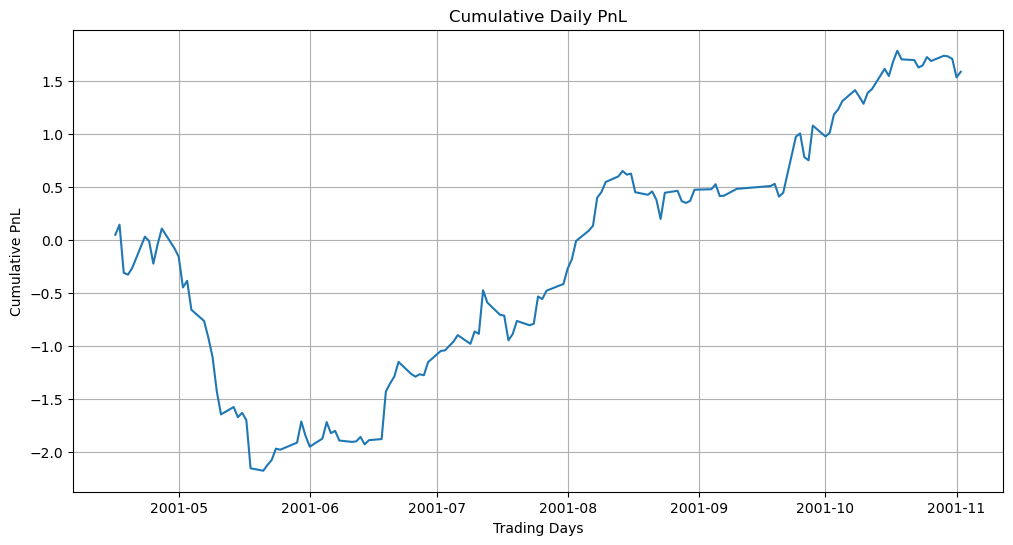

In [73]:
import time

start_time = time.time()
daily_PnL, date = execute_trading_strategy(win_threshold=0.05,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates,
                                     weighting_scheme='linear')
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

cumulative_pnl = np.cumsum(daily_PnL)

plt.figure(figsize=(12, 6))
plt.plot(date, cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.show()

Day 64: PnL = [ 0.03  0.   -0.08]
Day 67: PnL = [ 0.01 -0.01  0.06]
Day 70: PnL = [ 0.01 -0.1   0.01]
Day 71: PnL = [0.05]
Day 74: PnL = [-0.08 -0.06 -0.15]
Day 77: PnL = [ 0.01 -0.39 -0.04]
Day 80: PnL = [-0.11 -0.26 -0.27]
Day 82: PnL = [-0.01  0.08]
Day 85: PnL = [-0.01  0.03 -0.  ]
Day 88: PnL = [-0.26  0.01  0.06]
Day 89: PnL = [0.08]
Day 92: PnL = [-0.01 -0.1  -0.08]
Day 93: PnL = [0.08]
Day 96: PnL = [-0.16 -0.11  0.06]
Day 97: PnL = [0.09]
Day 100: PnL = [-0.08  0.02 -0.02]
Day 103: PnL = [0.01 0.01 0.02]
Day 106: PnL = [-0.01  0.02 -0.01]
Day 107: PnL = [0.14]
Day 109: PnL = [0.04 0.08]
Day 112: PnL = [ 0.04 -0.02  0.  ]
Day 115: PnL = [ 0.   -0.06  0.1 ]
Day 116: PnL = [0.06]
Day 118: PnL = [0.02 0.04]
Day 119: PnL = [0.07]
Day 122: PnL = [-0.05  0.07 -0.03]
Day 123: PnL = [0.2]
Day 126: PnL = [-0.02 -0.11  0.02]
Day 129: PnL = [-0.08  0.05  0.06]
Day 130: PnL = [0.06]
Day 132: PnL = [-0.01  0.09]
Day 134: PnL = [0.05 0.02]


/opt/miniconda3/envs/math285j_project/lib/python3.13/site-packages/signet/cluster.py:525: UserWarning: Exited at iteration 6 with accuracies 
[5.48e-06 2.02e-06 3.58e-06 4.10e-06 8.73e-03 1.18e-08 9.48e-11 4.89e-11
 3.34e-11 4.93e-12 3.58e-12 7.07e-12 6.87e-13 2.26e-13 4.10e-13 1.29e-12]
not reaching the requested tolerance 3.7342309951782227e-05.
Use iteration 6 instead with accuracy 
0.0005467730175517391.

  (w, v) = ss.linalg.lobpcg(matrix1, v0, B=matrix2, maxiter=mi, largest=False)


Day 137: PnL = [-0.03  0.02  0.03]
Day 140: PnL = [-0.01  0.03 -0.03]
Day 142: PnL = [-0.    0.12]
Day 145: PnL = [ 0.03 -0.03  0.  ]
Day 147: PnL = [0.03 0.03]
Day 150: PnL = [-0.02 -0.11  0.  ]
Day 153: PnL = [-0.04 -0.02 -0.01]
Day 154: PnL = [0.13]
Day 157: PnL = [ 0.02 -0.05 -0.05]
Day 159: PnL = [0.01 0.05]
Day 162: PnL = [-0.    0.04  0.05]
Day 165: PnL = [-0.06  0.02 -0.29]
Day 168: PnL = [ 0.03 -0.16 -0.05]
Day 169: PnL = [0.44]
Day 172: PnL = [ 0.04 -0.17 -0.  ]
Day 173: PnL = [0.26]
Day 176: PnL = [-0.09  0.01  0.07]
Day 178: PnL = [-0.01  0.07]
Day 181: PnL = [ 0.05 -0.05  0.06]
Day 184: PnL = [-0.14  0.06  0.06]
Day 187: PnL = [-0.08  0.06  0.09]
Day 190: PnL = [-0.02 -0.05 -0.03]
Day 191: PnL = [0.08]
Day 192: PnL = [0.11]
Day 195: PnL = [0.   0.03 0.04]
Day 198: PnL = [-0.02 -0.07  0.02]
Execution time: 89.02 seconds


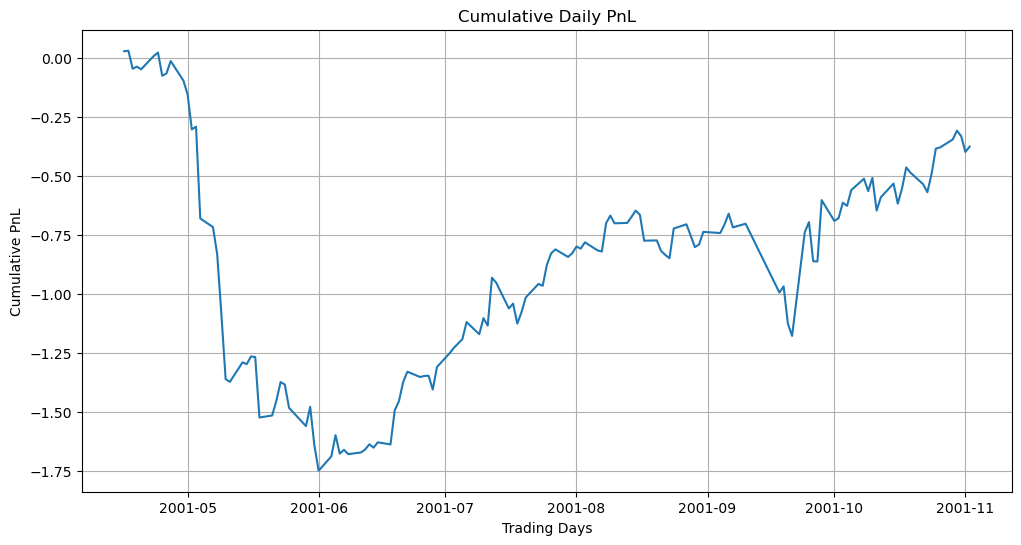

In [74]:
import time

start_time = time.time()
daily_PnL, date = execute_trading_strategy(win_threshold=0.05,
                                     lookback_window=60,
                                     lookforward_window=3,
                                     w=5,
                                     eligible_dates=eligible_dates,
                                     weighting_scheme='exponential')
end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

cumulative_pnl = np.cumsum(daily_PnL)

plt.figure(figsize=(12, 6))
plt.plot(date, cumulative_pnl)
plt.title('Cumulative Daily PnL')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative PnL')
plt.grid(True)
plt.show()